In [1]:
:module B2T2
:module MyModule

Imported module B2T2
Imported module MyModule


# Basic Tables

In [2]:
show students

"
| name    | age | favorite color |
| ------- | --- | -------------- |
| "Bob"   | 12  | "blue"         |
| "Alice" | 17  | "green"        |
| "Eve"   | 13  | "red"          |"


In [3]:
:t students

B2T2.ExampleTables.students : Table [<("name" :! String),
                                      ("age" :! Nat),
                                      ("favorite color" :! String)]


In [4]:
students

[<[<"Bob", 12, "blue"], [<"Alice", 17, "green"], [<"Eve", 13, "red"]]


We can refer to fields either by name, or by index

In [5]:
:t Column.column

Data.Table.Column.column : Field schema name type -> Table schema -> SnocList type


In [6]:
column "name" students

[<"Bob", "Alice", "Eve"]


In [7]:
column 2 students

[<"blue", "green", "red"]


In [8]:
column "grade" students

Error: Can't find an implementation for Field [<("name" :! String),
                                                ("age" :! Nat),
                                                ("favorite color" :! String)] "grade" ?type.

(Interactive):1:8--1:15
 1 | column "grade" students
            ^^^^^^^



# Field Constraints

We can constrain our column types

In [9]:
:printdef dot

B2T2.ExamplePrograms.DotProduct.dot : Num a =>
Field schema c1 a -> Field schema c2 a -> Table schema -> a
dot f1 f2 [<] = 0
dot f1 f2 (tbl :< rec) = dot f1 f2 tbl + (value f1 rec * value f2 rec)


In [10]:
show gradebook

"
| name    | age | quiz1 | quiz2 | midterm | quiz3 | quiz4 | final |
| ------- | --- | ----- | ----- | ------- | ----- | ----- | ----- |
| "Bob"   | 12  | 8     | 9     | 77      | 7     | 9     | 87    |
| "Alice" | 17  | 6     | 8     | 88      | 8     | 7     | 85    |
| "Eve"   | 13  | 7     | 9     | 84      | 8     | 8     | 77    |"


In [11]:
dot "quiz1" "quiz2" gradebook

183


# Whole-Schema Constraints

We can add aditional constraints to the whole schema

eg. The `AllColumns schema a` type is a proof type for all columns of the `schema` having type `a`

This constraint allows us to iterate over the columns of a table in a type-safe way.

In [12]:
:t pHacking

B2T2.ExamplePrograms.PHacking.pHacking : {auto 0 _ : AllColumns schema Bool} ->
Field schema baseCol Bool -> Table schema -> IO ()


In [13]:
:t jellyAnon

In [14]:
:exec pHacking "get acne" jellyAnon

We found no link between red jelly beans and acne (p > 0.05)
We found no link between black jelly beans and acne (p > 0.05)
We found no link between white jelly beans and acne (p > 0.05)
We found no link between green jelly beans and acne (p > 0.05)
We found no link between yellow jelly beans and acne (p > 0.05)
We found no link between brown jelly beans and acne (p > 0.05)
We found a link between orange jelly beans and acne (p < 0.05)
We found no link between pink jelly beans and acne (p > 0.05)
We found no link between purple jelly beans and acne (p > 0.05)


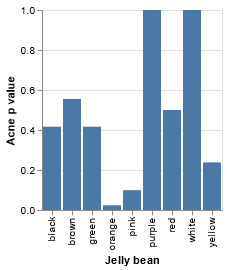

In [15]:
:exec display $ pHackingBar "get acne" jellyAnon

For a slightly more complicated example, the table `jellyNamed` additionally has the "name" field, of type `String`.

So `jellyNamed` does not have all columns of type `Bool`, but it does once we drop the column "name".

Our typing-system can cope with this.

In [16]:
column "name" jellyNamed

[<"Emily",
  "Jacob",
  "Emma",
  "Aidan",
  "Madison",
  "Ethan",
  "Hannah",
  "Matthew",
  "Hailey",
  "Nicholas"]


In [17]:
:exec pHacking "get acne" $ dropColumn "name" jellyNamed

We found no link between red jelly beans and acne (p > 0.05)
We found no link between black jelly beans and acne (p > 0.05)
We found no link between white jelly beans and acne (p > 0.05)
We found no link between green jelly beans and acne (p > 0.05)
We found no link between yellow jelly beans and acne (p > 0.05)
We found no link between brown jelly beans and acne (p > 0.05)
We found a link between orange jelly beans and acne (p < 0.05)
We found no link between pink jelly beans and acne (p > 0.05)
We found no link between purple jelly beans and acne (p > 0.05)


# Custom Schema Constraints

The `GradebookSchema schema a` proof type proves that all columns in the `schema` whose name starts with "quiz" are of type `a`.

`quizAverage` takes the average of all "quiz" columns.

In [18]:
:t QuizScoreFilter.quizAverage

B2T2.ExamplePrograms.QuizScoreFilter.quizAverage : GradebookSchema schema Nat =>
Record schema -> Double


In [19]:
:printdef GradebookSchema

B2T2.ExamplePrograms.QuizScoreFilter.GradebookSchema : Schema -> Type -> Type
GradebookSchema schema a = All (\{arg:0} => GradebookColumn arg a) schema


In [20]:
:doc GradebookColumn

data B2T2.ExamplePrograms.QuizScoreFilter.GradebookColumn : FieldSchema -> Type -> Type
  Totality: total
  Constructors:
    QuizCol : So (isPrefixOf "quiz" name) -> GradebookColumn (name :! a) a
    NoQuizCol : So (not (isPrefixOf "quiz" name)) -> GradebookColumn (name :! type) a
